# 获取数据

## 日线（Tushare）

In [5]:
import  configparser
config = configparser.ConfigParser()
config.read('../config.ini')
token = config.get('tushare', 'token')

import tushare as ts
ts.set_token(token)

origin_daily_300 = ts.pro_bar(ts_code='000300.SH', asset='I').sort_values('trade_date')
origin_daily_300

,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount
4135,000300.SH,20050104,982.7940,994.7690,994.7690,980.6580,1000.0000,-17.2060,-1.7206,7.412869e+06,4.431977e+06
4134,000300.SH,20050105,992.5640,981.5770,997.3230,979.8770,982.7940,9.7700,0.9941,7.119109e+06,4.529208e+06
4133,000300.SH,20050106,983.1740,993.3310,993.7880,980.3300,992.5640,-9.3900,-0.9460,6.288029e+06,3.921015e+06
4132,000300.SH,20050107,983.9580,983.0450,995.7110,979.8120,983.1740,0.7840,0.0797,7.298694e+06,4.737469e+06
4131,000300.SH,20050110,993.8790,983.7600,993.9590,979.7890,983.9580,9.9210,1.0083,5.791698e+06,3.762933e+06
...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20211231,4940.3733,4937.4630,4950.3639,4923.1392,4921.5109,18.8624,0.3833,1.213137e+08,2.669754e+08
3,000300.SH,20220104,4917.7653,4957.9835,4961.4527,4874.5337,4940.3733,-22.6080,-0.4576,1.515348e+08,3.365170e+08
2,000300.SH,20220105,4868.1202,4907.9347,4916.2822,4851.9835,4917.7653,-49.6451,-1.0095,1.788161e+08,3.639445e+08
1,000300.SH,20220106,4818.2318,4842.1560,4857.5596,4786.4330,4868.1202,-49.8884,-1.0248,1.576658e+08,3.217501e+08


## 周线（Tushare）

In [53]:
# origin_weekly_300 = ts.pro_bar(ts_code='000300.SH', freq='W', asset='I').sort_values('trade_date')
# origin_weekly_300

## 周线（JoinQuant）

In [1]:
import  configparser
config = configparser.ConfigParser()
config.read('../config.ini')
user, passwd = config.get('joinquant', 'user'), config.get('joinquant', 'passwd')

from jqdatasdk import *
auth(user, passwd)

origin_weekly_300 = get_bars( security = '000300.XSHG', 
          count = 215,
          unit = '1w',
          fields=['date','open','high','low','close', 'volume', 'money'],
          include_now=True, 
          end_dt='2010-5-21', 
          fq_ref_date=None,df=True)
origin_weekly_300

auth success 


,date,open,high,low,close,volume,money
0,2006-02-24,1020.74,1049.69,1014.66,1049.44,1.073388e+10,5.746471e+10
1,2006-03-03,1055.95,1057.69,1029.56,1041.68,1.077295e+10,5.865252e+10
2,2006-03-10,1041.75,1044.42,999.93,1008.90,7.929362e+09,4.056368e+10
3,2006-03-17,1008.80,1029.81,1008.51,1024.02,6.774227e+09,3.566738e+10
4,2006-03-24,1024.50,1051.76,1019.65,1042.60,9.367427e+09,5.040939e+10
...,...,...,...,...,...,...,...
210,2010-04-23,3313.50,3313.50,3130.96,3190.00,3.518169e+10,4.913214e+11
211,2010-04-30,3195.46,3207.72,3014.07,3067.36,2.649250e+10,3.709442e+11
212,2010-05-07,3005.49,3056.08,2817.15,2836.79,2.208089e+10,2.960437e+11
213,2010-05-14,2842.37,2922.13,2756.42,2868.02,2.592194e+10,3.261597e+11


# 计算指标
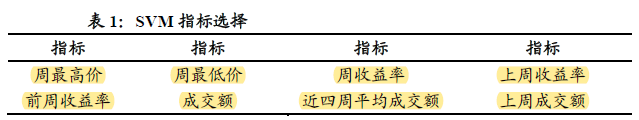

In [94]:
def calc_indicators(mkt_data):
    indi_cols = ['high', 'low', 'pct_chg', 'pct_chg_pre1', 'pct_chg_pre2', 'money_ma4', 'money_pre1']
    # high
    
    # low
    
    # pct_chg
    mkt_data['pct_chg'] = 100 * (mkt_data.close / mkt_data.close.shift(1) - 1)
    # pct_chg_pre1
    mkt_data['pct_chg_pre1'] = mkt_data['pct_chg'].shift(1)
    # pct_chg_pre2
    mkt_data['pct_chg_pre2'] = mkt_data['pct_chg'].shift(2)
    
    if 'money' in mkt_data.columns:
        # money

        # money_ma4
        mkt_data['money_ma4'] = mkt_data['money'].rolling(4).mean()
        # money_pre1
        mkt_data['money_pre1'] = mkt_data['money'].shift(1)
    elif 'amount' in mkt_data.columns:
        # amount

        # amount_ma20
        mkt_data['amount_ma20'] = mkt_data['amount'].rolling(20).mean()
        # money_pre1
        mkt_data['amount_pre1'] = mkt_data['amount'].shift(1)
    return mkt_data

# 滚动预测计算信号

In [49]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [26]:
def train_svm_model(X_train, y_train):
    # X为全部列， Y为下一期的pct_chg
    svm_clf = Pipeline(( ("scaler", StandardScaler()),
                         ("linear_svc", LinearSVC(C=1, loss="hinge")) ,))
    # 下周上涨为1，否则为0
    svm_clf.fit( X_train, (y_train>0).astype(int) )
    return svm_clf

In [67]:
def rolling_calc_signal(mkt_data, 
                        X_cols=['close','open','high','low','pre_close','change','pct_chg','vol','amount'], 
                        y_col='pct_chg',
                        N = 20,):
    signals = np.empty(shape=mkt_data[y_col].shape)
    print('Start Rolling Predict...')
    print('N={}, X.shape[0]='.format(N, mkt_data.shape[0]))
    for i in range(len(mkt_data)-N):
        # 每次取N+1行，并用前N行进行训练，最后一行用于预测:
        tmp_data = mkt_data[i:i+N+1].copy()
        # 训练
        X_train = tmp_data[X_cols].values[:-1]
        y_train = tmp_data[y_col].values[1:]
        model = train_svm_model(X_train, y_train)
        # 预测
        X_predict = tmp_data[X_cols].values[[-1]]
        y_predict = model.predict(X_predict)
        signals[i+N] = y_predict[0]
    mkt_data['signal'] = signals
    print('Finish Rolling Predict~')
    return mkt_data

# 计算持仓

In [41]:
def calc_position(mkt_data, allow_signal_shift=False):
    # 信号是否会出现多空翻转，还是代表恢复空仓
    mkt_data['signal_last'] = mkt_data['signal'].shift(1)
    if allow_signal_shift:
        mkt_data['position'] = mkt_data['signal'].fillna(method='ffill').shift(1).fillna(0)
    else:
        mkt_data['position'] = mkt_data['signal']
    return mkt_data

# 比对结果

In [47]:
def statistic_performance(mkt_data):
    position = mkt_data['position']

    # 序列型特征 ----------------------------------
    # 持仓收益
    hold_r = mkt_data['pct_chg']/100 * position
    # 持仓胜负
    hold_win = hold_r>0
    # 持仓净值曲线
    hold_cumu_r = (1+hold_r).cumprod() - 1
    # 回撤
    drawdown = (hold_cumu_r.cummax()-hold_cumu_r)/(1+hold_cumu_r).cummax()    
    # 超额收益
    ex_hold_r= hold_r-0.03/250

    mkt_data['hold_r'] = hold_r
    mkt_data['hold_win'] = hold_win
    mkt_data['hold_cumu_r'] = hold_cumu_r
    mkt_data['drawdown'] = drawdown
    mkt_data['ex_hold_r'] = ex_hold_r
    
    # 数值型特征 ----------------------------------
    # 累计收益
    v_hold_cumu_r = hold_cumu_r.tolist()[-1]
    # 多仓次数， 多仓胜率， 多仓平均持有期
    # 空仓次数， 空仓胜率， 空仓平均持有期
    v_pos_hold_times= 0 
    v_neg_hold_times= 0 
    v_pos_hold_win_times = 0
    v_neg_hold_win_times = 0
    v_pos_hold_period = 0
    v_neg_hold_period = 0
    v_pos_hold_win_period = 0
    v_neg_hold_win_period = 0
    for w, r, pre_pos, pos in zip(hold_win, hold_r, position.shift(1), position):
        # 有换仓（先结算上一次持仓，再初始化本次持仓）
        if pre_pos!=pos: 
            # 判断pre_pos非空：若为空则是循环的第一次，此时无需结算，直接初始化持仓即可
            if pre_pos == pre_pos:
                # 结算上一次持仓
                if pre_pos>0:
                    v_pos_hold_times += 1
                    v_pos_hold_period += tmp_hold_period
                    v_pos_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:
                        v_pos_hold_win_times+=1
                elif pre_pos<0:
                    v_neg_hold_times += 1      
                    v_neg_hold_period += tmp_hold_period
                    v_neg_hold_win_period += tmp_hold_win_period
                    if tmp_hold_r>0:                    
                        v_neg_hold_win_times+=1
            # 初始化本次持仓
            tmp_hold_r = r
            tmp_hold_period = 0
            tmp_hold_win_period = 0
        else: # 未换仓
            if abs(pos)>0:
                tmp_hold_period += 1
                if r>0:
                    tmp_hold_win_period += 1
                if abs(r)>0:
                    tmp_hold_r = (1+tmp_hold_r)*(1+r)-1       
    #最后一次持仓未结束，不纳入统计

    # 日胜率【持仓天数，持仓收益天数】    
    #v_hold_period = v_pos_hold_period + v_neg_hold_period
    #v_hold_win_period = v_pos_hold_win_period + v_neg_hold_win_period
    v_hold_period = (abs(position)>0).sum()
    v_hold_win_period = (hold_r>0).sum()
    
    # 最大回撤
    v_max_dd = drawdown.max()    
    # 年化收益
    v_annual_ret=pow(1+v_hold_cumu_r, 250/len(mkt_data))-1
    # 年化标准差
    
    #年化夏普
    v_sharpe=np.sqrt(len(ex_hold_r))*ex_hold_r.mean()/ex_hold_r.std()    
    
    performance_cols = ['累计收益', 
                        '多仓次数', '多仓胜率', '多仓平均持有期', 
                        '空仓次数', '空仓胜率', '空仓平均持有期', 
                        '日胜率', '最大回撤', '年化收益/最大回撤',
                        '年化收益', '年化标准差', '年化夏普'
                       ]
    performance_values = [v_hold_cumu_r,
                          v_pos_hold_times, 
                              0 if v_pos_hold_times==0 else v_pos_hold_win_times/v_pos_hold_times, 
                              0 if v_pos_hold_times==0 else v_pos_hold_period/v_pos_hold_times,
                          v_neg_hold_times, 
                              0 if v_neg_hold_times==0 else v_neg_hold_win_times/v_neg_hold_times, 
                              0 if v_neg_hold_times==0 else v_neg_hold_period/v_neg_hold_times,
                          v_hold_win_period/v_hold_period, v_max_dd, v_annual_ret/v_max_dd,
                          v_annual_ret, 0, v_sharpe
                         ]
    performance_df = pd.DataFrame(performance_values, index=performance_cols)
    
    return mkt_data, performance_df

## 可视化

In [38]:
import datetime
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column, row, gridplot, layout
from bokeh.models import Span
output_notebook()

Loading BokehJS ...

In [39]:
def visualize_performance(mkt_data):
    mkt_data['trade_datetime'] = mkt_data['trade_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))
    dt = mkt_data['trade_datetime']

    f1 = figure(height=300, width=700, 
                sizing_mode='stretch_width', 
                title='Target Trend',
                x_axis_type='datetime',
                x_axis_label="trade_datetime", y_axis_label="close")
    f2 = figure(height=200, sizing_mode='stretch_width', 
                title='Position',
                x_axis_label="trade_datetime", y_axis_label="position",
                x_axis_type='datetime',
                x_range=f1.x_range)
    f3 = figure(height=200, sizing_mode='stretch_width', 
                title='Return',
                x_axis_type='datetime',
                x_range=f1.x_range)
    f4 = figure(height=200, sizing_mode='stretch_width', 
                title='Drawdown',
                x_axis_type='datetime',
                x_range=f1.x_range)

    indi = figure(height=200, sizing_mode='stretch_width', 
                  title='KDJ',
                  x_axis_type='datetime',
                  x_range=f1.x_range
                 )

    # 绘制行情
    close = mkt_data['close']
    cumu_hold_close = (mkt_data['hold_cumu_r']+1) * close.tolist()[0]
    f1.line(dt, close, line_width=1)
    f1.line(dt, cumu_hold_close, line_width=1, color='red')

    # 绘制指标

    # 绘制仓位
    position = mkt_data['position']
    f2.step(dt, position)

    # 绘制收益
    hold_r = mkt_data['hold_r']
    f3.vbar(x=dt, top=hold_r)

    # 绘制回撤
    drawdown = mkt_data['drawdown']
    f4.line(dt, -drawdown, line_width=1)

    #p = column(f1,f2,f3,f4)
    p = gridplot([ [f1],
                   [indi],
                   [f2], 
                   [f3],
                   [f4]
                 ])
    show(p)

# 整体执行

## Daily

In [109]:
# 前20期构建指标时存在空，去掉
origin_daily_300 = calc_indicators(origin_daily_300)
daily_300 = origin_daily_300[20:].copy()

# 设定X和Y，滚动训练+预测 signal
indi_cols = ['close', 'high', 'low', 'pct_chg', 'pct_chg_pre1', 'pct_chg_pre2', 'amount', 'amount_ma20', 'amount_pre1']
daily_300 = rolling_calc_signal(daily_300, N=100, 
                                 X_cols=indi_cols, 
                                 y_col='pct_chg',)

# 根据signal生成position
daily_300 = calc_position(daily_300, allow_signal_shift=True)
daily_300

Start Rolling Predict...
N=100, X.shape[0]=


C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

Finish Rolling Predict~


,ts_code,trade_date,close,open,high,low,pre_close,change,pct_chg,vol,amount,pct_chg_pre1,pct_chg_pre2,amount_ma20,amount_pre1,signal,signal_last,position
4115,000300.SH,20050201,955.9510,953.3300,965.4770,952.7410,954.8790,1.0720,0.112266,7.433067e+06,4.275707e+06,-1.478525,-0.556313,4.542575e+06,3.863574e+06,1.443175e-311,NaN,0.000000e+00
4114,000300.SH,20050202,1006.9130,956.7010,1006.9320,956.7010,955.9510,50.9620,5.331026,1.705734e+07,1.020290e+07,0.112266,-1.478525,4.826259e+06,4.275707e+06,1.443175e-311,1.443175e-311,1.443175e-311
4113,000300.SH,20050203,993.2150,1005.5630,1014.1870,992.1550,1006.9130,-13.6980,-1.360396,1.697454e+07,1.005731e+07,5.331026,0.112266,5.133074e+06,1.020290e+07,2.261635e+06,1.443175e-311,1.443175e-311
4112,000300.SH,20050204,1016.8580,992.2500,1021.0250,989.9390,993.2150,23.6430,2.380451,1.573621e+07,9.549871e+06,-1.360396,5.331026,5.373694e+06,1.005731e+07,2.261635e+06,2.261635e+06,2.261635e+06
4111,000300.SH,20050216,1023.5840,1023.3240,1033.2480,1018.4870,1016.8580,6.7260,0.661449,1.213129e+07,7.438168e+06,2.380451,-1.360396,5.557456e+06,9.549871e+06,2.289313e+06,2.261635e+06,2.261635e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,000300.SH,20211231,4940.3733,4937.4630,4950.3639,4923.1392,4921.5109,18.8624,0.383264,1.213137e+08,2.669754e+08,0.778758,-1.462561,3.062624e+08,2.680225e+08,1.000000e+00,0.000000e+00,0.000000e+00
3,000300.SH,20220104,4917.7653,4957.9835,4961.4527,4874.5337,4940.3733,-22.6080,-0.457617,1.515348e+08,3.365170e+08,0.383264,0.778758,3.064179e+08,2.669754e+08,1.000000e+00,1.000000e+00,1.000000e+00
2,000300.SH,20220105,4868.1202,4907.9347,4916.2822,4851.9835,4917.7653,-49.6451,-1.009505,1.788161e+08,3.639445e+08,-0.457617,0.383264,3.075843e+08,3.365170e+08,1.000000e+00,1.000000e+00,1.000000e+00
1,000300.SH,20220106,4818.2318,4842.1560,4857.5596,4786.4330,4868.1202,-49.8884,-1.024798,1.576658e+08,3.217501e+08,-1.009505,-0.457617,3.072185e+08,3.639445e+08,1.000000e+00,1.000000e+00,1.000000e+00


In [110]:
# 评价和展现
#result_daily_300, performance_df = statistic_performance(daily_300[daily_300['trade_date'].apply(lambda x: x>='20060818' and x<='20100521')])
result_daily_300, performance_daily_300 = statistic_performance(daily_300)

visualize_performance(result_daily_300)
print(performance_daily_300)

<ipython-input-47-3d167a95da09>:94: RuntimeWarning: invalid value encountered in double_scalars
  v_hold_win_period/v_hold_period, v_max_dd, v_annual_ret/v_max_dd,


                    0
累计收益              inf
多仓次数       457.000000
多仓胜率         0.439825
多仓平均持有期      4.501094
空仓次数         0.000000
空仓胜率         0.000000
空仓平均持有期      0.000000
日胜率          0.541700
最大回撤              inf
年化收益/最大回撤         NaN
年化收益              inf
年化标准差        0.000000
年化夏普        -0.667006


## Weekly

In [105]:
# 前3期构建指标时存在空，去掉
origin_weekly_300 = calc_indicators(origin_weekly_300)
weekly_300 = origin_weekly_300[3:].copy()

# 设定X和Y，滚动训练+预测 signal
indi_cols = ['open','close', 'high', 'low', 
             'pct_chg', 'pct_chg_pre1', 'pct_chg_pre2', 
             'money', 'money_ma4', 'money_pre1']
weekly_300 = rolling_calc_signal( weekly_300, N=20, 
                                  X_cols=indi_cols, 
                                  y_col='pct_chg',)
# 根据signal生成position
weekly_300 = calc_position(weekly_300, allow_signal_shift=True)
weekly_300

Start Rolling Predict...
N=20, X.shape[0]=


C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\xuezhihuan\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase

Finish Rolling Predict~


,date,open,high,low,close,volume,money,pct_chg,pct_chg_pre1,pct_chg_pre2,money_ma4,money_pre1,signal,signal_last,position
3,2006-03-17,1008.80,1029.81,1008.51,1024.02,6.774227e+09,3.566738e+10,1.498662,-3.146840,-0.739442,4.808707e+10,4.056368e+10,4.940656e-324,NaN,0.000000e+00
4,2006-03-24,1024.50,1051.76,1019.65,1042.60,9.367427e+09,5.040939e+10,1.814418,1.498662,-3.146840,4.632324e+10,3.566738e+10,9.881313e-324,4.940656e-324,4.940656e-324
5,2006-03-31,1042.63,1074.04,1037.08,1061.09,1.142231e+10,5.985001e+10,1.773451,1.814418,1.498662,4.662261e+10,5.040939e+10,1.482197e-323,9.881313e-324,9.881313e-324
6,2006-04-07,1061.96,1109.68,1061.96,1103.15,1.605533e+10,8.921588e+10,3.963848,1.773451,1.814418,5.878566e+10,5.985001e+10,1.976263e-323,1.482197e-323,1.482197e-323
7,2006-04-14,1104.32,1126.09,1091.67,1118.61,1.653610e+10,8.700694e+10,1.401441,3.963848,1.773451,7.162055e+10,8.921588e+10,2.470328e-323,1.976263e-323,1.976263e-323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2010-04-23,3313.50,3313.50,3130.96,3190.00,3.518169e+10,4.913214e+11,-4.955711,-0.675906,-0.827036,4.371601e+11,4.691603e+11,1.000000e+00,1.000000e+00,1.000000e+00
211,2010-04-30,3195.46,3207.72,3014.07,3067.36,2.649250e+10,3.709442e+11,-3.844514,-4.955711,-0.675906,4.167632e+11,4.913214e+11,1.000000e+00,1.000000e+00,1.000000e+00
212,2010-05-07,3005.49,3056.08,2817.15,2836.79,2.208089e+10,2.960437e+11,-7.516887,-3.844514,-4.955711,4.068674e+11,3.709442e+11,0.000000e+00,1.000000e+00,1.000000e+00
213,2010-05-14,2842.37,2922.13,2756.42,2868.02,2.592194e+10,3.261597e+11,1.100892,-7.516887,-3.844514,3.711172e+11,2.960437e+11,0.000000e+00,0.000000e+00,0.000000e+00


In [107]:
# 评价和展现
weekly_300['trade_date'] = weekly_300['date'].apply(lambda x: str(x).replace('-', ''))
#result_weekly_300, performance_df = statistic_performance(weekly_300[weekly_300['trade_date'].apply(lambda x: x>='20060818' and x<='20100521')])
result_daily_300, performance_weekly_300 = statistic_performance(daily_300)

visualize_performance(result_weekly_300)
print(performance_weekly_300)

<ipython-input-47-3d167a95da09>:94: RuntimeWarning: invalid value encountered in double_scalars
  v_hold_win_period/v_hold_period, v_max_dd, v_annual_ret/v_max_dd,
<ipython-input-39-f9e056be416a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mkt_data['trade_datetime'] = mkt_data['trade_date'].apply(lambda x: datetime.datetime.strptime(x, '%Y%m%d'))


                    0
累计收益              inf
多仓次数       523.000000
多仓胜率         0.445507
多仓平均持有期      3.803059
空仓次数         0.000000
空仓胜率         0.000000
空仓平均持有期      0.000000
日胜率          0.542130
最大回撤              inf
年化收益/最大回撤         NaN
年化收益              inf
年化标准差        0.000000
年化夏普         0.000000


In [82]:
result_weekly_300

,date,open,high,low,close,volume,money,pct_chg,pct_chg_pre1,pct_chg_pre2,...,signal,signal_last,position,trade_date,hold_r,hold_win,hold_cumu_r,drawdown,ex_hold_r,trade_datetime
24,2006-08-18,1275.14,1283.57,1239.90,1267.87,8.098900e+09,4.752526e+10,-0.006099,0.027168,-0.074162,...,1.0,1.0,1.0,20060818,-0.000061,False,-0.000061,0.000000,-0.000181,2006-08-18
25,2006-08-25,1235.43,1301.75,1229.16,1295.44,8.499783e+09,5.310423e+10,0.021745,-0.006099,0.027168,...,1.0,1.0,1.0,20060825,0.000217,True,0.000156,0.000000,0.000097,2006-08-25
26,2006-09-01,1298.46,1349.20,1298.36,1318.10,1.273116e+10,7.895842e+10,0.017492,0.021745,-0.006099,...,0.0,1.0,1.0,20060901,0.000175,True,0.000331,0.000000,0.000055,2006-09-01
27,2006-09-08,1315.71,1348.28,1315.61,1332.15,1.102333e+10,6.544244e+10,0.010659,0.017492,0.021745,...,0.0,0.0,0.0,20060908,0.000000,False,0.000331,0.000000,-0.000120,2006-09-08
28,2006-09-15,1331.89,1362.40,1319.21,1362.32,1.393448e+10,8.060244e+10,0.022648,0.010659,0.017492,...,0.0,0.0,0.0,20060915,0.000000,False,0.000331,0.000000,-0.000120,2006-09-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,2010-04-23,3313.50,3313.50,3130.96,3190.00,3.518169e+10,4.913214e+11,-0.049557,-0.006759,-0.008270,...,1.0,1.0,1.0,20100423,-0.000496,False,0.009098,0.002221,-0.000616,2010-04-23
211,2010-04-30,3195.46,3207.72,3014.07,3067.36,2.649250e+10,3.709442e+11,-0.038445,-0.049557,-0.006759,...,0.0,1.0,1.0,20100430,-0.000384,False,0.008710,0.002605,-0.000504,2010-04-30
212,2010-05-07,3005.49,3056.08,2817.15,2836.79,2.208089e+10,2.960437e+11,-0.075169,-0.038445,-0.049557,...,1.0,0.0,0.0,20100507,-0.000000,False,0.008710,0.002605,-0.000120,2010-05-07
213,2010-05-14,2842.37,2922.13,2756.42,2868.02,2.592194e+10,3.261597e+11,0.011009,-0.075169,-0.038445,...,0.0,1.0,1.0,20100514,0.000110,True,0.008821,0.002495,-0.000010,2010-05-14
